# Team IPPS 

The API information can be accessed through this [link](https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3)

Objectives (This will expand from just data frame formation to include cleanup by Jessie):
1. Execute a successful pull of all of the data using the API provided into JSON
2. Transform the JSON format into a data frame


### Step 1: Installing sodapy, a python package, in jupyter

In [2]:
# Installing the package sodapy, important for retrieval using the API's detailed method
import sys
!{sys.executable} -m pip install sodapy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Step 2: Retrieving the dataset

In [20]:
# The API link
link = "https://data.cms.gov/resource/ehrv-m9r6.json"

# The app token
key = "oBbcgRhXZS4dqtTJVyz6zQujv"

# Code snippet for data retrieval using python, as provided by the API information page
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cms.gov", key)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cms.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ehrv-m9r6", limit=163065)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Checking the head of the data frame
results_df.head(10)

,average_covered_charges,average_medicare_payments,average_medicare_payments_2,drg_definition,hospital_referral_region_description,provider_city,provider_id,provider_name,provider_state,provider_street_address,provider_zip_code,total_discharges
0,32963.07,5777.24,4763.73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,DOTHAN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,36301,91
1,15131.85,5787.57,4976.71,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,BOAZ,10005,MARSHALL MEDICAL CENTER SOUTH,AL,2505 U S HIGHWAY 431 NORTH,35957,14
2,37560.37,5434.95,4453.79,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,FLORENCE,10006,ELIZA COFFEE MEMORIAL HOSPITAL,AL,205 MARENGO STREET,35631,24
3,13998.28,5417.56,4129.16,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,BIRMINGHAM,10011,ST VINCENT'S EAST,AL,50 MEDICAL PARK EAST DRIVE,35235,25
4,31633.27,5658.33,4851.44,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,ALABASTER,10016,SHELBY BAPTIST MEDICAL CENTER,AL,1000 FIRST STREET NORTH,35007,18
5,16920.79,6653.80,5374.14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Montgomery,MONTGOMERY,10023,BAPTIST MEDICAL CENTER SOUTH,AL,2105 EAST SOUTH BOULEVARD,36116,67
6,11977.13,5834.74,4761.41,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,OPELIKA,10029,EAST ALABAMA MEDICAL CENTER AND SNF,AL,2000 PEPPERELL PARKWAY,36801,51
7,35841.09,8031.12,5858.5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,BIRMINGHAM,10033,UNIVERSITY OF ALABAMA HOSPITAL,AL,619 SOUTH 19TH STREET,35233,32
8,28523.39,6113.38,5228.4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,HUNTSVILLE,10039,HUNTSVILLE HOSPITAL,AL,101 SIVLEY RD,35801,135
9,75233.38,5541.05,4386.94,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,GADSDEN,10040,GADSDEN REGIONAL MEDICAL CENTER,AL,1007 GOODYEAR AVENUE,35903,34


In [22]:
#convert columns to int/float type
results_df["total_discharges"] = results_df["total_discharges"].astype(int)
results_df["average_covered_charges"] = results_df["average_covered_charges"].astype(float)

#average_medicare_payments is total payments from medicare + other sources such as patient deductible
results_df["average_medicare_payments"] = results_df["average_medicare_payments"].astype(float)
stateGB = results_df.groupby(["provider_state"])

## state vs provider count
stateGB_result = pd.DataFrame(stateGB["provider_id"].nunique())
stateGB_result.rename(columns={"provider_id": "Provider Count"}, inplace=True)


## state vs total discharges
stateGB_result["Sum of Total Discharges"] = stateGB["total_discharges"].sum()

## state discharges vs DRG count
stateGB_result["DRG Count"] = stateGB["drg_definition"].nunique()
stateGB_result

,Provider Count,Sum of Total Discharges,DRG Count
provider_state,,,
AK,9,6142,78
AL,93,142704,100
AR,45,86769,100
AZ,61,104604,100
CA,299,474979,100
CO,45,61320,100
CT,31,96258,100
DC,7,20307,100
DE,6,26753,100


In [23]:
##drg code count by state, sort by highest
resultGB = results_df.groupby(["provider_state","drg_definition"])
drgCtByState = pd.DataFrame(resultGB["provider_id"].count())
drgCtByState.rename(columns = {"provider_id": "Provider Count"}, inplace = True)
drgCtByState["Rank"]= drgCtByState["Provider Count"].rank(method='max')
drgCtByStateRN = drgCtByState.sort_values(by="Rank", ascending = False)
drgCtByStateRNnoMax = drgCtByStateRN.reset_index()
drgCtByStateRNMaxReset = drgCtByStateRN.groupby(["provider_state"]).max().reset_index()

##join to filter out the highest rank by state
drgCTByStateRNJOIN = pd.merge(drgCtByStateRNMaxReset, drgCtByStateRNnoMax, on=["provider_state", "Provider Count", "Rank"])
drgCTByStateRNJOIN

,provider_state,Provider Count,Rank,drg_definition
0,AK,8,1380.0,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS..."
1,AK,8,1380.0,194 - SIMPLE PNEUMONIA & PLEURISY W CC
2,AK,8,1380.0,603 - CELLULITIS W/O MCC
3,AL,86,4642.0,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC
4,AR,43,3764.0,194 - SIMPLE PNEUMONIA & PLEURISY W CC
5,AZ,54,4102.0,603 - CELLULITIS W/O MCC
6,CA,273,5025.0,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...
7,CO,44,3806.0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
8,CT,31,3233.0,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...
9,CT,31,3233.0,683 - RENAL FAILURE W CC


In [24]:
#How do states differ in total cost paid by patient/covered by medicare ratio

stateGB_result["Average of Average Covered Charges"] = np.round(stateGB["average_covered_charges"].mean(), decimals=2)
stateGB_result["Average of Average Total Payments"] = np.round(stateGB["average_medicare_payments"].mean(), decimals=2)
stateGB_result["Charges-to-Payment-Received Ratio"] = np.round(stateGB_result["Average of Average Covered Charges"]/
                                                               stateGB_result["Average of Average Total Payments"], decimals=2)
stateGB_result

,Provider Count,Sum of Total Discharges,DRG Count,Average of Average Covered Charges,Average of Average Total Payments,Charges-to-Payment-Received Ratio
provider_state,,,,,,
AK,9,6142,78,40348.74,14572.39,2.77
AL,93,142704,100,31316.46,7568.23,4.14
AR,45,86769,100,26174.53,8019.25,3.26
AZ,61,104604,100,41200.06,10154.53,4.06
CA,299,474979,100,67508.62,12629.67,5.35
CO,45,61320,100,41095.14,9502.69,4.32
CT,31,96258,100,31318.41,11365.45,2.76
DC,7,20307,100,40116.66,12998.03,3.09
DE,6,26753,100,27071.70,10360.07,2.61


(0, 7.2)

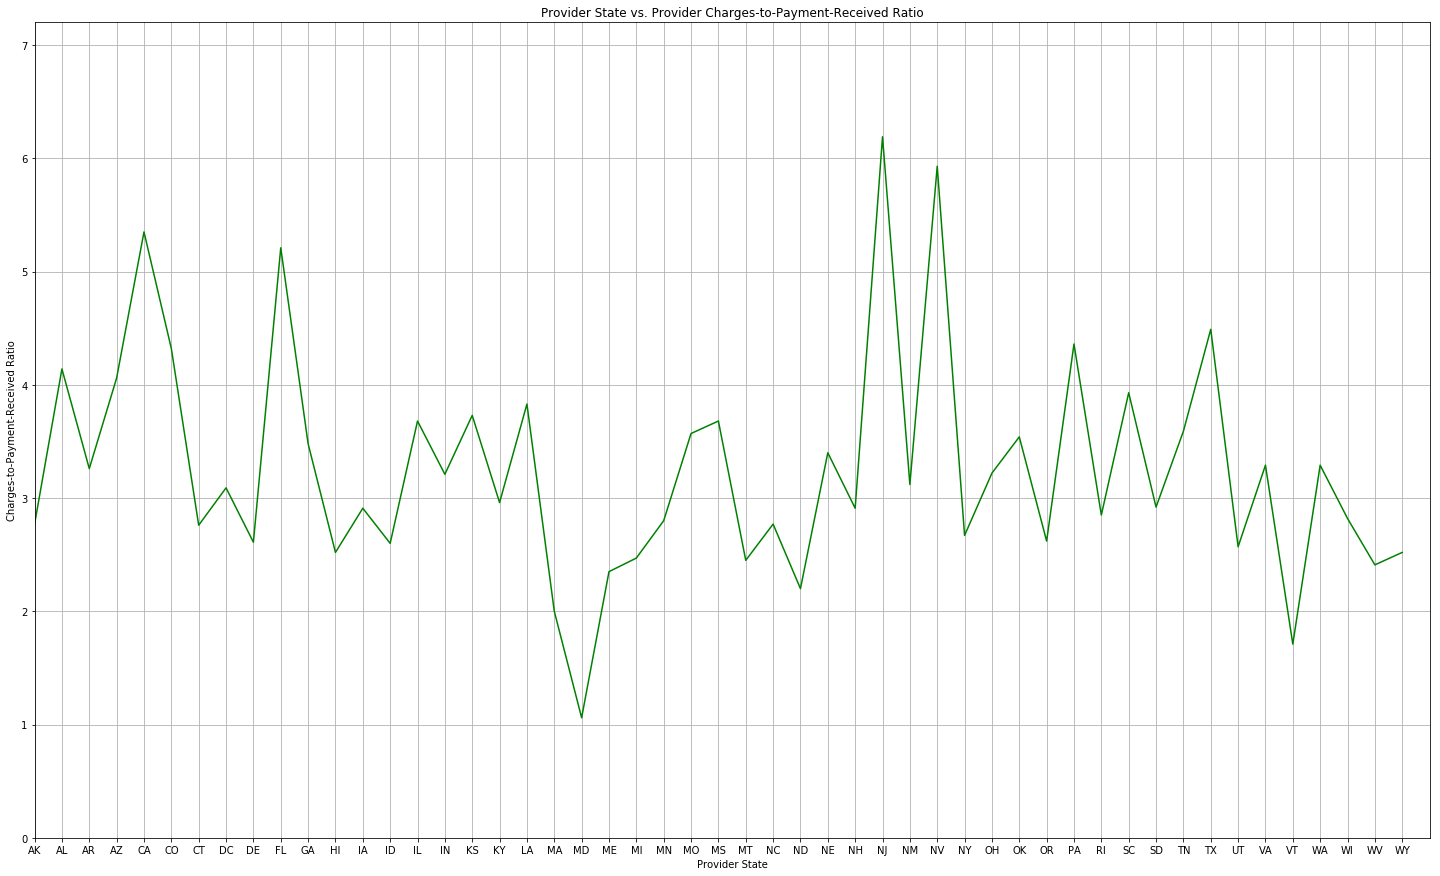

In [25]:
stateGB_result = stateGB_result.reset_index()
plt.figure(figsize=(25,15))
plt.plot(stateGB_result["Average of Average Covered Charges"], stateGB_result["Charges-to-Payment-Received Ratio"], color ="green")
plt.title("Provider State vs. Provider Charges-to-Payment-Received Ratio")
plt.ylabel('Charges-to-Payment-Received Ratio')
plt.xlabel("Provider State")
plt.grid(True)
plt.xlim(0, 51)
plt.ylim(0, 7.2)

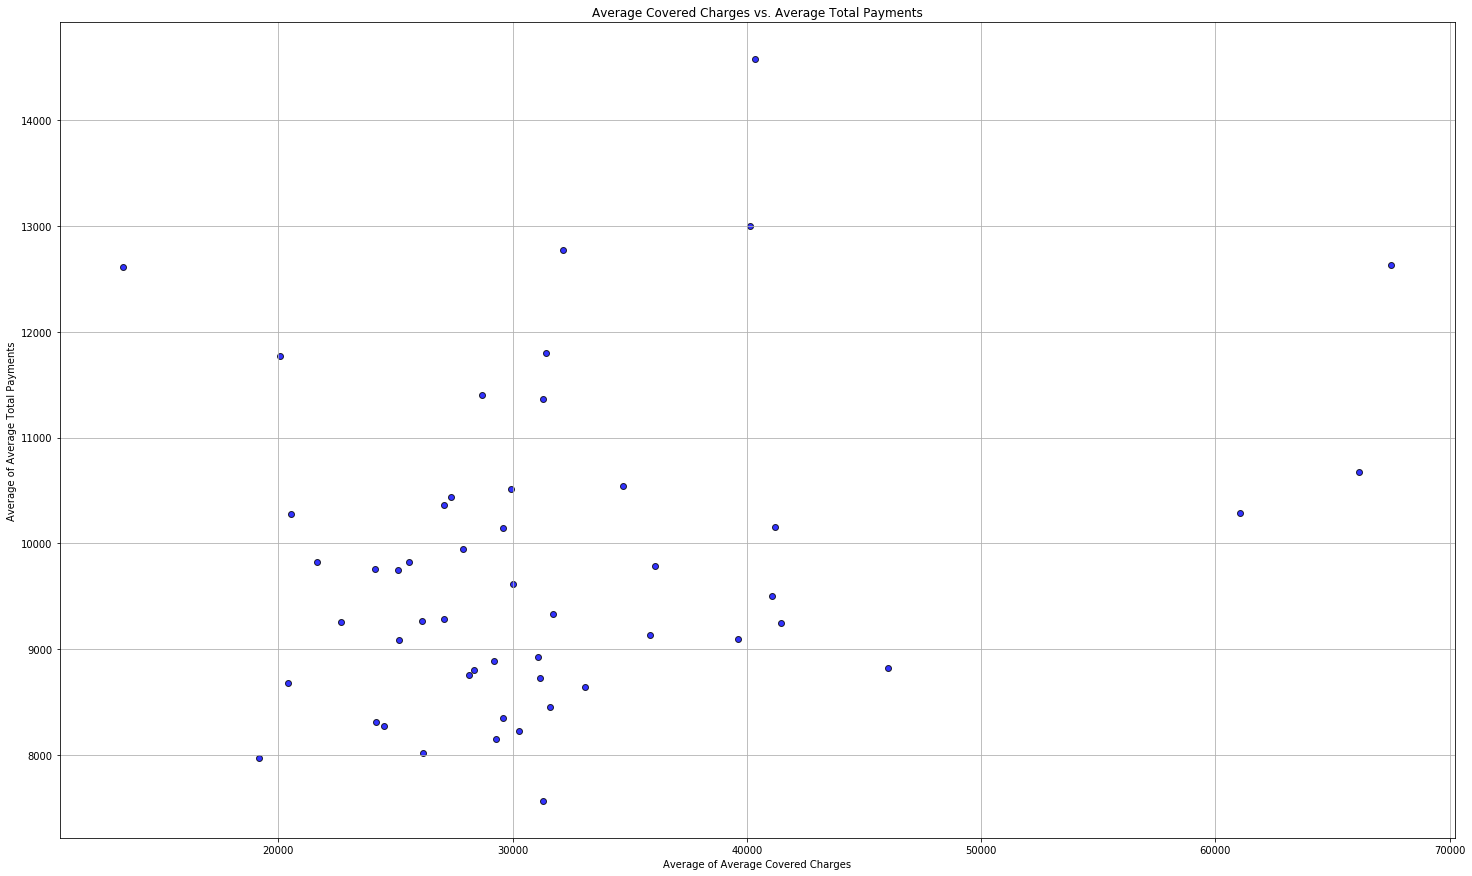

In [31]:
plt.figure(figsize=(25,15))
plt.scatter(stateGB_result["Average of Average Covered Charges"], stateGB_result["Average of Average Total Payments"]
            , color='blue',alpha=.8, linewidth=1, edgecolor='black')
plt.title("Average Covered Charges vs. Average Total Payments")
plt.ylabel('Average of Average Total Payments')
plt.xlabel("Average of Average Covered Charges")
plt.grid(True)
#plt.xlim(0, 51)
#plt.ylim(0, 7.2)